## Bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import lxml
import requests
import re
import numpy as np
import pandas as pd
from urllib import request, response, error, parse
from urllib.request import urlopen
from bs4 import BeautifulSoup

## Setup para o scraping

In [2]:
url = "http://www.gcg.ufjf.br/publications.html"
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
title = soup.title 
titleText = title.get_text()
print(titleText)

Group for Computer Graphics, Image and Vision - UFJF


## Declaração das varáveis que irão conter os dados

In [3]:
# data variables
d_year = []
d_publi_cont = []
d_size = []
d_downloads = []
d_qualis = []

## Obtenção dos dados brutos

In [4]:
anos = soup.find_all('div', class_='sized box shadow')
for ano in anos:
    d_year.append(ano.find('h2').get_text())
    print(d_year[len(d_year)-1] + " -> ")
    publicacoes = ano.find_all('div', class_='panel publ')
    print("Número de publicações: " + str(len(publicacoes)))
    d_publi_cont.append(len(publicacoes))
    for publicacao in publicacoes: 
        detail = publicacao.find('div', class_='detail')
        detail_p = detail.find('p')
        qualis = detail_p.find('small', class_='qualis')
        ########################################
        info = publicacao.find('div', class_='info')
        if info is not None:
            downloads = info.find('p')
        ########################################
        doc = publicacao.find('span', class_='doc')
        doc_size = doc.find('a')
        ########################################
        print("Tamanho do arquivo: " + doc_size.get_text())
        d_size.append(doc_size.get_text())
        if downloads is not None:
            print("Dowloads: " + downloads.get_text())
            d_downloads.append(downloads.get_text())
        else:
            print("Dowloads: NA")
            d_downloads.append("NA")

        if qualis is not None:
            print("Qualis: " + qualis.get_text())
            d_qualis.append(qualis.get_text())
        else:
            print("Qualis: NA")
            d_qualis.append("NA")
            
        print("----------")
    print("##########")
            

2019 -> 
Número de publicações: 8
Tamanho do arquivo: pdf (16.1 MB)
Dowloads: 26 downloads
Qualis: A1
----------
Tamanho do arquivo: pdf (2.1 MB)
Dowloads: 60 downloads
Qualis: B1
----------
Tamanho do arquivo: pdf (1.4 MB)
Dowloads: 40 downloads
Qualis: B1
----------
Tamanho do arquivo: pdf (5.4 MB)
Dowloads: 28 downloads
Qualis: NA
----------
Tamanho do arquivo: pdf (5.8 MB)
Dowloads: 27 downloads
Qualis: NA
----------
Tamanho do arquivo: Download
Dowloads: 27 downloads
Qualis: NA
----------
Tamanho do arquivo: pdf (3.5 MB)
Dowloads: 49 downloads
Qualis: NA
----------
Tamanho do arquivo: pdf (25.3 MB)
Dowloads: 16 downloads
Qualis: NA
----------
##########
2018 -> 
Número de publicações: 6
Tamanho do arquivo: pdf (8.5 MB)
Dowloads: 22 downloads
Qualis: B3
----------
Tamanho do arquivo: Download
Dowloads: 22 downloads
Qualis: B1
----------
Tamanho do arquivo: Download
Dowloads: 22 downloads
Qualis: NA
----------
Tamanho do arquivo: pdf (39.0 MB)
Dowloads: 21 downloads
Qualis: NA
-----

## Tratando os dados obtidos

In [5]:
print("Anos de atividade: " + str(len(d_year))) 
print(d_year)

total_publi = str(sum(d_publi_cont))
print("Número de Publicações: " + total_publi)
print(d_publi_cont)

print("Tamanho dos arquivos: " + str(len(d_size)))
r_sizes = []
for size in d_size:
    index = size.find('KB')
    hasSize = size.find('Download')
    if hasSize == -1:
        number = re.findall(r"[-+]?\d*\.\d+|\d+", size)
        if index > 0: # 1KB == 0.001 MB
            aux = float(number[len(number)-1])
            aux = round(aux * 0.001, 2)
            r_sizes.append(aux)
        else: 
            r_sizes.append(number[len(number)-1])
    else:
        r_sizes.append(-1)
print(r_sizes)

print("Downloads: " + str(len(d_downloads))) 
r_downloads = []
for download in d_downloads:
    number = ([int(i) for i in download.split() if i.isdigit()])
    r_downloads.append(str(number[len(number)-1]))
print(r_downloads)

print("Qualis: " + str(len(d_qualis)))
print(d_qualis)

Anos de atividade: 16
['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004']
Número de Publicações: 133
[8, 6, 6, 6, 7, 14, 14, 11, 14, 7, 13, 9, 8, 2, 5, 3]
Tamanho dos arquivos: 133
['16.1', '2.1', '1.4', '5.4', '5.8', -1, '3.5', '25.3', '8.5', -1, -1, '39.0', '4.3', '18.2', '4.7', '2.2', '5.7', '22.7', '4.8', '5.7', '3.9', 0.31, 0.67, '1.3', '3.0', '20.1', 0.54, '7.8', '1.1', 0.72, '5.0', '13.5', '31.9', 0.98, 0.4, 0.35, '7.3', '2.3', '8.4', '10.0', '7.2', '11.2', '14.0', '1.2', '1.9', '10.4', '13.4', '4.7', '6.4', '1.1', '2.3', '2.5', 0.24, '2.5', '2.2', '3.2', '14.5', '2.2', '5.1', '12.2', '20.2', '5.9', 0.48, 0.17, '3.2', '5.3', 0.27, '1.0', '1.2', '4.6', 0.77, '19.3', 0.79, 0.56, '12.5', 0.45, '1.4', '1.9', '2.5', '9.7', '23.0', '21.8', '5.8', '7.7', '2.6', '15.6', '1.1', '14.8', '1.9', '7.5', '6.6', '3.5', 0.78, '3.3', '3.5', '8.0', 0.79, 0.41, '1.1', '1.9', '3.2', '7.1', '1.5', 0.86, '1.7', '4.6', '3.6',

## Criando Dataset com os dados obtidos

In [6]:
anos_col = []
index = 0
for ano in d_year:
    contador = 0
    while (contador < d_publi_cont[index]):
        anos_col.append(ano)
        contador   = contador + 1
    index = index + 1

df_geral = pd.DataFrame(list(zip(d_year, d_publi_cont)), 
               columns = ['Ano', 'Publicacoes'])
df_publicacoes = pd.DataFrame(list(zip(anos_col, r_sizes, r_downloads, d_qualis)), 
               columns = ['Ano', 'Tamanho', 'Downloads', 'Qualis'])
print(df_geral)
print(df_publicacoes)

     Ano  Publicacoes
0   2019            8
1   2018            6
2   2017            6
3   2016            6
4   2015            7
5   2014           14
6   2013           14
7   2012           11
8   2011           14
9   2010            7
10  2009           13
11  2008            9
12  2007            8
13  2006            2
14  2005            5
15  2004            3
      Ano Tamanho Downloads Qualis
0    2019    16.1        26     A1
1    2019     2.1        60     B1
2    2019     1.4        40     B1
3    2019     5.4        28     NA
4    2019     5.8        27     NA
..    ...     ...       ...    ...
128  2005     1.2       107     A1
129  2005    0.87        77      C
130  2004     3.9        34     A2
131  2004    0.37        53     B3
132  2004    0.04        44     NA

[133 rows x 4 columns]


## Gráficos dos dados obtidos

### CDF

In [7]:
def cdf(dados,va_discreta):
    if va_discreta:
        num_bins=200
        hx, hy, _ = plt.hist(dados, bins=num_bins, density=True, cumulative=True, histtype='step')
        plt.close()
        dx = hy[1] - hy[0]
        F1 = np.cumsum(hx)*dx
        # Constrói a fingura com as informações
        fig, ax = plt.subplots(figsize=(10,5))
        ax.step(hy[1:], hx, where="post")
        ax.set_title('Função de Distribuição Cumulativa - V.A. discreta')
        ax.set_xlabel("x")
        ax.set_ylabel("P(X <= x)")
        plt.show()
    else:
        dx = dados[2]-dados[1]
        y  = 0.25*np.exp((-dados ** 2)/8)
        y=y/ (np.sum(dx * y))
        cdf = np.cumsum(y * dx)
        # Constrói a fingura com as informações
        plt.plot(dados,cdf)
        plt.xlabel("x")
        plt.ylabel("P(X <= x)")
        plt.title("Função de Distribuição Cumulativa - V.A. contínua")
        plt.show()

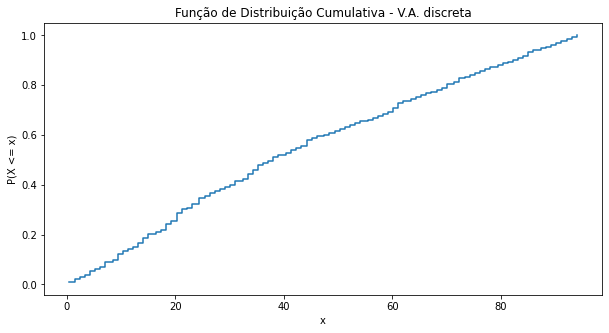

In [8]:
cdf(df_publicacoes["Downloads"], True)

O gráfico mostra a a relação entre o valor do número de downloads das publicações do GCG. Podemos ver que 40 dowloads já está ácima de 50% dessa amostra.

### PMF

In [9]:
def pmf(dados):
    # Pega os valores únicos e quantas vezes esse valores aparecem
    val, cnt = np.unique(dados, return_counts=True)
    # Calcula a função de massa de probabilidade
    pmf = cnt / len(dados)
    # Faz a relação entre valor e probabilidade
    np.column_stack((val, pmf))
    # Constrói a figura com as informações
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(val, pmf, 'k^')
    ax.vlines(val, 0, pmf, colors='k', linestyles='-', lw=1)
    ax.set_title("Função de Massa de Probabilidade")
    ax.set_xlabel('x')
    ax.set_ylabel("P(x)")
    plt.show()

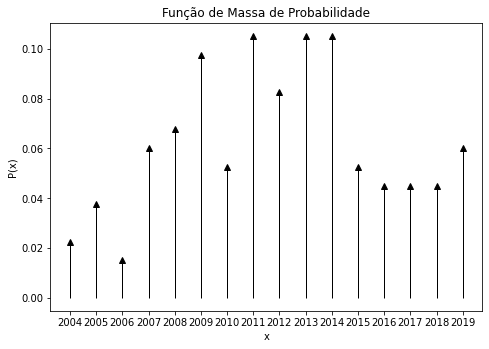

In [10]:
pmf(df_publicacoes["Ano"])

O gráfico mostra a relação do número de publicações por ano do GCG e atribui a essa relação uma probabilidade